# Regularization methods
Ridge regularization method using gradient descent and stochastic gradient descent

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt   
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso

## Communities and Crime Data Preprocessing

In [25]:

data_path = "data/communities.data"
data = pd.read_csv(data_path, header=None, na_values=['?'])

# Reading attribute names from the .names file
def load_attribute_names(names_path):
    attribute_names = []
    with open(names_path, 'r') as f:
        for line in f:
            if line.startswith('@attribute'):
                attribute_name = line.split()[1]
                attribute_names.append(attribute_name)
    return attribute_names

names_path = "data/communities.names"
attribute_names = load_attribute_names(names_path)

data.columns = attribute_names

print(data.head())


   state  county  community        communityname  fold  population  \
0      8     NaN        NaN         Lakewoodcity     1        0.19   
1     53     NaN        NaN          Tukwilacity     1        0.00   
2     24     NaN        NaN         Aberdeentown     1        0.00   
3     34     5.0    81440.0  Willingborotownship     1        0.04   
4     42    95.0     6096.0    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0           0.33          0.02          0.90          0.12  ...      0.12   
1           0.16          0.12          0.74          0.45  ...      0.02   
2           0.42          0.49          0.56          0.17  ...      0.01   
3           0.77          1.00          0.08          0.12  ...      0.02   
4           0.55          0.02          0.95          0.09  ...      0.04   

   PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0     0.26            0.20       0.06  

In [26]:
data = data.drop(data.columns[0:5], axis=1)

data = data.fillna(data.mean())

total_missing = data.isna().sum().sum()
print(f"Total missing values: {total_missing}")

y = data['ViolentCrimesPerPop']
X = data.drop(columns=['ViolentCrimesPerPop'])


Total missing values: 0


In [27]:
# since regularization methods like Ridge and Lasso are sensitive to the scale of the features, we need to normalize the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Ridge and Lasso Regression

Fit models using ridge and lasso regression. Try different values of the regularization
parameter and evaluate its effect. Choose the optimal regularization parameter and
discribe how you did it.

Alpha values:  [1.00000000e-03 4.64158883e-03 2.15443469e-02 1.00000000e-01
 4.64158883e-01 2.15443469e+00 1.00000000e+01 4.64158883e+01
 2.15443469e+02 1.00000000e+03]


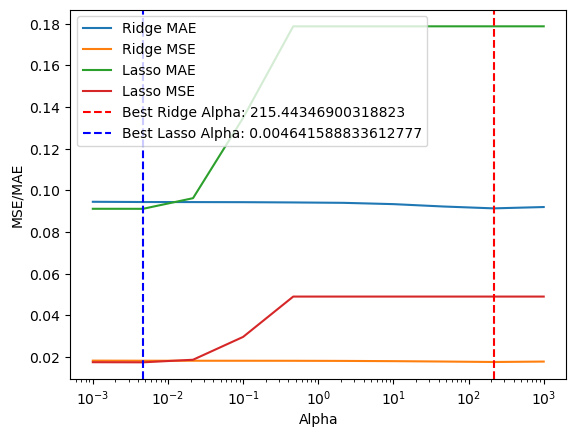

Best alpha for Ridge: 215.44346900318823
Best alpha for Lasso: 0.004641588833612777
Best Ridge Alpha: 215.44346900318823, MAE: 0.09133170124601857, MSE: 0.017491192593826397
Best Lasso Alpha: 0.004641588833612777, MAE: 0.09111247114704406, MSE: 0.017334253970267534


In [30]:


def fit_ridge(X_train, y_train, X_test, y_test, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # print('\nRIDGE ---\nMAE: ', mae, '\nMSE: ', mse, '\nalpha: ', alpha)
    return mae, mse

def fit_lasso(X_train, y_train, X_test, y_test, alpha):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    # print('\nLASSO --- \nMAE: ', mae, '\nMSE: ', mse, '\nalpha: ', alpha)
    return mae, mse

alpha_values = np.logspace(-3, 3, 10)
print("Alpha values: ", alpha_values)

ridge_mae_values = []
ridge_mse_values = []
lasso_mae_values = []
lasso_mse_values = []

for alpha in alpha_values:
    mae, mse = fit_ridge(X_train_scaled, y_train, X_test_scaled, y_test, alpha)
    ridge_mae_values.append(mae)
    ridge_mse_values.append(mse)

    mae, mse = fit_lasso(X_train_scaled, y_train, X_test_scaled, y_test, alpha)
    lasso_mae_values.append(mae)
    lasso_mse_values.append(mse)

best_ridge_alpha = alpha_values[np.argmin(ridge_mse_values)]
best_lasso_alpha = alpha_values[np.argmin(lasso_mse_values)]

plt.plot(alpha_values, ridge_mae_values, label='Ridge MAE')
plt.plot(alpha_values, ridge_mse_values, label='Ridge MSE')
plt.plot(alpha_values, lasso_mae_values, label='Lasso MAE')
plt.plot(alpha_values, lasso_mse_values, label='Lasso MSE')
plt.axvline(x=best_ridge_alpha, color='r', linestyle='--', label=f'Best Ridge Alpha: {best_ridge_alpha}')
plt.axvline(x=best_lasso_alpha, color='b', linestyle='--', label=f'Best Lasso Alpha: {best_lasso_alpha}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE/MAE')
plt.legend()
plt.show()

print(f"Best alpha for Ridge: {best_ridge_alpha}")
print(f"Best alpha for Lasso: {best_lasso_alpha}")

ridge_mae, ridge_mse = fit_ridge(X_train_scaled, y_train, X_test_scaled, y_test, best_ridge_alpha)
lasso_mae, lasso_mse = fit_lasso(X_train_scaled, y_train, X_test_scaled, y_test, best_lasso_alpha)

print(f"Best Ridge Alpha: {best_ridge_alpha}, MAE: {ridge_mae}, MSE: {ridge_mse}")
print(f"Best Lasso Alpha: {best_lasso_alpha}, MAE: {lasso_mae}, MSE: {lasso_mse}")

To choose the optimal regularization parameter I generated alpha values with the help of the function np.logspace(-3, 3, 10) which generates 10 values between 10^-3 and 10^3. This range was chosen to cover a wide spectrum of possible regularization strengths, from very small (almost no regularization) to very large (strong regularization). I then calculated the mean absolute error and mean squared error for each alpha value for both Ridge and Lasso regression. I chose the alpha value that minimizes the mean squared error for both Ridge and Lasso regression.

### Compare the attributes selected with forward attribute selection (the results from the previous assignment) with the attributes lasso selected.

In [17]:
# Forward attribute selection results from previous assignment

# ['PctKids2Par',
#  'racePctWhite',
#  'HousVacant',
#  'pctUrban',
#  'PctWorkMom',
#  'MalePctDivorce',
#  'PctIlleg',
#  'RacialMatchCommPol',
#  'NumStreet',
#  'PctHousOccup',
#  'population']

In [32]:
lasso = Lasso(alpha=best_lasso_alpha)
lasso.fit(X_train_scaled, y_train)
lasso_selected_features = X_train.columns[lasso.coef_ != 0]  # select features with non-zero coefficients
lasso_selected_features_list = lasso_selected_features.tolist()
print("Lasso selected features: ", lasso_selected_features_list)

Lasso selected features:  ['racepctblack', 'racePctWhite', 'agePct12t29', 'pctUrban', 'pctWInvInc', 'AsianPerCap', 'OtherPerCap', 'PctEmplManu', 'MalePctDivorce', 'PctKids2Par', 'PctYoungKids2Par', 'PctWorkMom', 'PctIlleg', 'PctPersDenseHous', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'MedRentPctHousInc', 'MedOwnCostPctIncNoMtg', 'NumStreet', 'PctForeignBorn', 'PolicReqPerOffic', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'LemasPctOfficDrugUn']


#### Based on the comparison, we can conclude that:
- *Common Features*: The features racePctWhite, pctUrban, PctWorkMom, MalePctDivorce, PctIlleg, HousVacant, PctHousOccup, and NumStreet were selected by both forward feature selection and Lasso regression, indicating their strong relevance to the target variable.
- *Unique to Forward Selection*: The features RacialMatchCommPol and population were selected only by forward feature selection, suggesting that these features might provide incremental improvements in model performance that Lasso did not capture.
- *Unique to Lasso Regression*: The features racepctblack, agePct12t29, pctWInvInc, AsianPerCap, OtherPerCap, PctEmplManu, PctYoungKids2Par, PctPersDenseHous, PctVacantBoarded, MedRentPctHousInc, MedOwnCostPctIncNoMtg, PctForeignBorn, PolicReqPerOffic, PctPolicWhite, PctPolicBlack, and LemasPctOfficDrugUn were selected only by Lasso regression, indicating that Lasso's regularization might have identified these features as important while controlling for multicollinearity and overfitting.

## Wine quality dataset

In [22]:
wine_data_path = "data/winequality-white.csv"
wine_data = pd.read_csv(wine_data_path, header=0, sep=';')
wine_data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
total_missing = data.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


In [24]:
y_wine = wine_data['quality']
X_wine = wine_data.drop(columns=['quality'])

X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

scaler2 = StandardScaler()
X_wine_train_scaled = scaler2.fit_transform(X_wine_train)

X_wine_test_scaled = scaler2.transform(X_wine_test)

## Implement ridge regression with:
- gradient descent
- stochastic gradient descent

(Implement gradient descent from scratch)

### Test different learning rates and try to find the optimal one.

### Compare the time to convergence and the results of the two gradient descents you implemented